# backtest momentum strategies
* Can we do better than HODL?
* Can we capture most of the upside and protect against large drawdowns
* Effect of leverage
* Also try using hourly data
* Try mean reversion between ETH and BTC (use ETH priced in BTC)
* Pantera - buy when cross above 200 day MA and sell 1 year later (done)
* Test effect of buy and sell delays (eg assume it takes 1 or even 2 days to transfer to exchange and you don't want to leave money on the exchange). Affect was not as bad as I thought.

In [1]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import backtest_functions as bt
import backtesters
reload(backtesters)
from backtesters import MABacktester

In [2]:
# Get price data from Quandl
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
# Remove the 0's
bitcoin = bitcoin.loc['2011-01-01':] # bitcoin.loc['2010-08-17':]
bitcoin.columns = ['Last']
#bitcoin = bitcoin.resample('W').last()

In [39]:
reload(backtesters)
from backtesters import MABacktester
train = MABacktester(bitcoin['Last'],ms=1,ml=21, ema=False) 
print train
print train.results()

MA Backtest Strategy (ms=1, ml=21, ema=False, long_only=False, start=2011-01-01, end=2018-06-24)
{'Strategy_pa': 528.44, 'Market_pa': 276.35, 'Trades': 189, 'Strategy': 93043746.44, 'Sharpe': 4.91, 'Years': 7.48, 'Market': 2012262.94}


In [73]:
reload(backtesters)
from backtesters import PanteraBacktester
pantera = PanteraBacktester(bitcoin['Last'], ml = 200, hold = 365) 
print pantera
print pantera.results()

Pantera Backtest Strategy (ms=1, ml=200, hold=365, ema=False, start=2011-01-01, end=2018-06-24)
{'Strategy_pa': 22.49, 'Market_pa': 276.35, 'Trades': 11, 'Strategy': 355.86, 'Sharpe': 0.86, 'Years': 7.48, 'Market': 2012262.94}


Pantera Backtest Strategy (ms=1, ml=200, hold=365, ema=False, start=2011-01-01, end=2018-06-24)


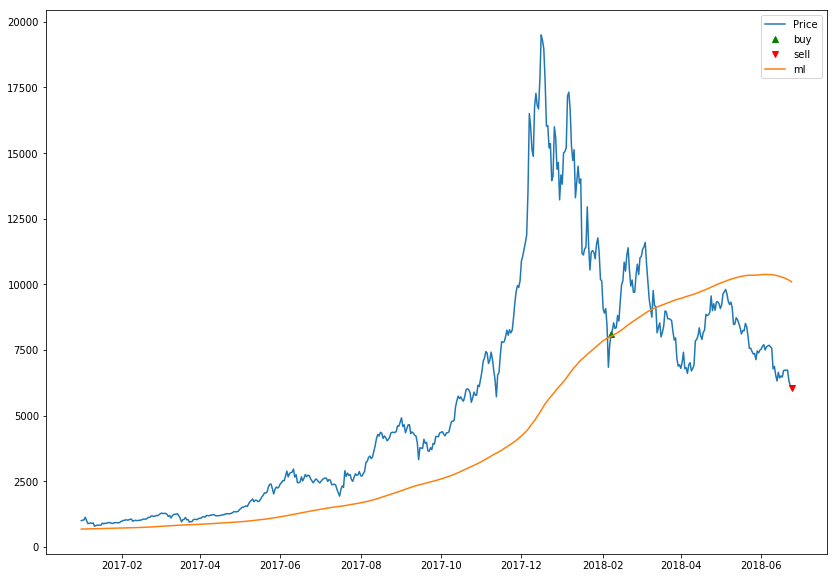

In [74]:
print pantera
pantera.plot(start_date='2017',figsize=(14,10))

In [52]:
pantera_trades = pantera.trades()
print "Average return %.1f%%" % (pantera_trades['Return'].mean() * 100)
pantera_trades

Average return 147.5%


,Type,Entry,Exit,Days,Return
Date,,,,,
2011-07-19,Long,14.040,9.275,365,-0.339394
2013-07-07,Long,77.640,623.700,365,7.033230
2014-07-31,Long,601.940,280.720,365,-0.533641
2015-10-05,Long,246.670,609.620,365,1.471399
2018-02-07,Long,8099.958,6037.008,137,-0.254686


In [142]:
reload(backtesters)
from backtesters import RSIBacktester
RSI = RSIBacktester(bitcoin['Last'], long_only=False, buy_on=60, sell_on=40) 
print RSI
print RSI.results()

RSI Backtest Strategy (lookback=14, buy_on=60, sell_on=40, long_only=False, start=2011-01-01, end=2018-06-24)
{'Strategy_pa': 430.87, 'Market_pa': 276.35, 'Trades': 446, 'Strategy': 26348813.88, 'Sharpe': 5.05, 'Years': 7.48, 'Market': 2012262.94}


RSI Backtest Strategy (lookback=14, buy_on=60, sell_on=40, long_only=False, start=2011-01-01, end=2018-06-24)


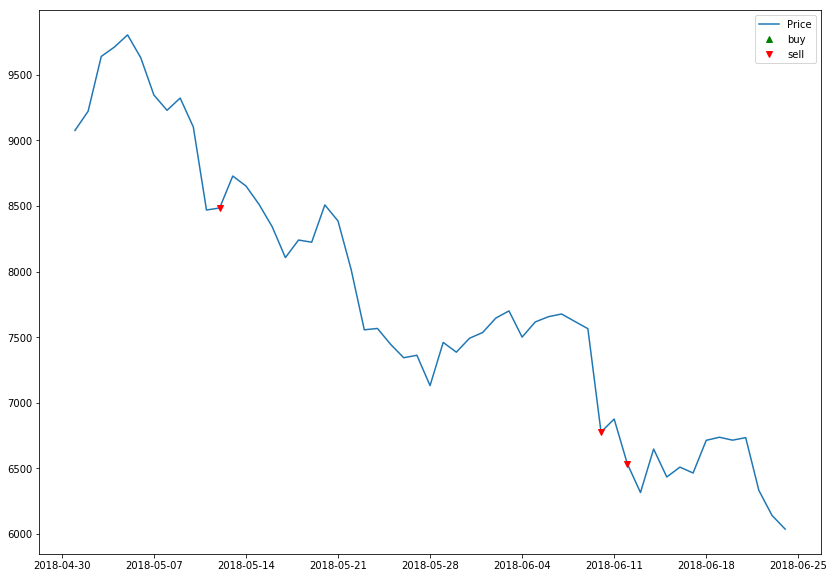

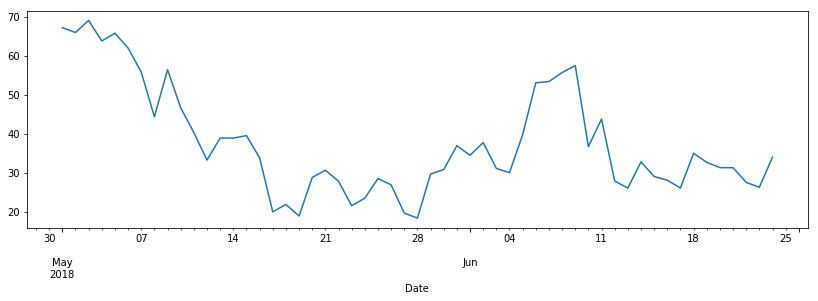

In [146]:
print RSI
RSI.plot(start_date='2018-5',end_date='2018-6',figsize=(14,10))

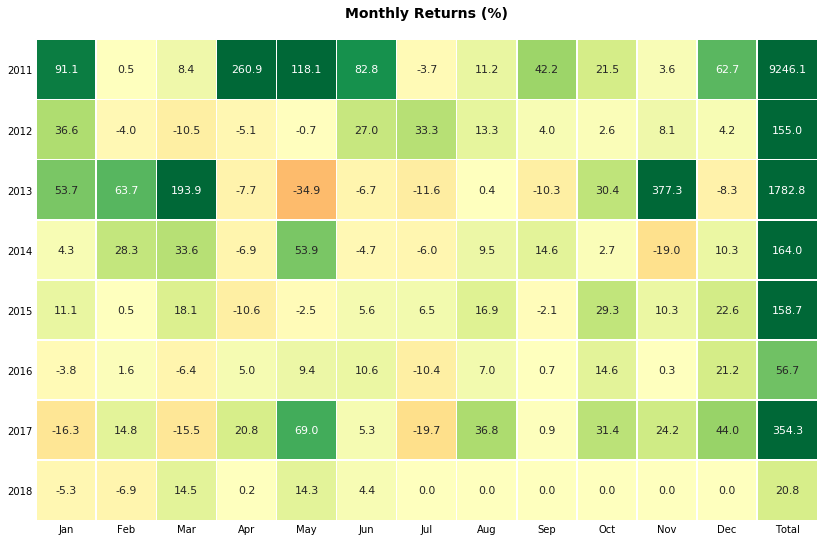

In [144]:
RSI.plot_heatmap(figsize=(14,10))

In [145]:
print RSI
RSI.trades()

RSI Backtest Strategy (lookback=14, buy_on=60, sell_on=40, long_only=False, start=2011-01-01, end=2018-06-24)


,Type,Entry,Exit,Days,Return
Date,,,,,
2011-01-15,Long,0.400,0.950,39.0,1.374750
2011-01-19,Long,0.367,0.950,35.0,1.584762
2011-01-29,Long,0.480,0.950,25.0,0.978958
2011-02-15,Long,1.050,0.950,8.0,-0.095497
2011-02-23,Short,0.950,0.897,47.0,0.058974
2011-02-25,Short,0.989,0.897,45.0,0.102081
2011-03-08,Short,0.884,0.897,34.0,-0.014770
2011-03-13,Short,0.900,0.897,29.0,0.003344
2011-03-28,Short,0.800,0.897,14.0,-0.108138


In [40]:
train = MABacktester(bitcoin['Last'],ms=10,ml=21, long_only=True, ema=False)
print train
print train.results()

MA Backtest Strategy (ms=10, ml=21, ema=False, long_only=True, start=2011-01-01, end=2018-06-24)
{'Strategy_pa': 423.63, 'Market_pa': 276.35, 'Trades': 107, 'Strategy': 23778732.55, 'Sharpe': 5.47, 'Years': 7.48, 'Market': 2012262.94}


MA Backtest Strategy (ms=10, ml=21, ema=False, long_only=True, start=2011-01-01, end=2018-06-24)


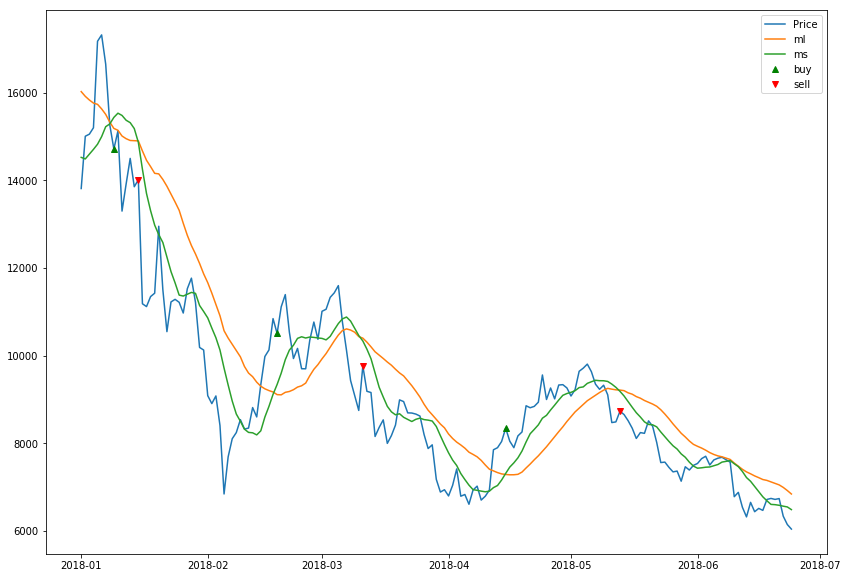

In [41]:
print train
train.plot(start_date='2018',figsize=(14,10))

In [17]:
print train
trades = train.trades()
print "%d trades" % len(trades)
#trades.to_html('table.html', border=1)
trades

MA Backtest Strategy (ms=10, ml=21, ema=False, long_only=True, start=2011-01-01, end=2018-06-24)
53 trades


,Type,Entry,Exit,Days,Return
Date,,,,,
2011-01-21,Long,0.430,1.000,34,1.326122
2011-04-14,Long,1.090,15.500,67,13.220314
2011-08-21,Long,11.501,9.481,7,-0.175628
2011-11-02,Long,3.299,3.000,7,-0.090634
2011-12-01,Long,3.138,6.515,53,1.076163
2012-03-02,Long,4.780,4.683,22,-0.020295
2012-04-06,Long,4.980,5.022,10,0.008448
2012-04-17,Long,5.178,5.184,15,0.001120
2012-05-22,Long,5.160,10.619,95,1.057971


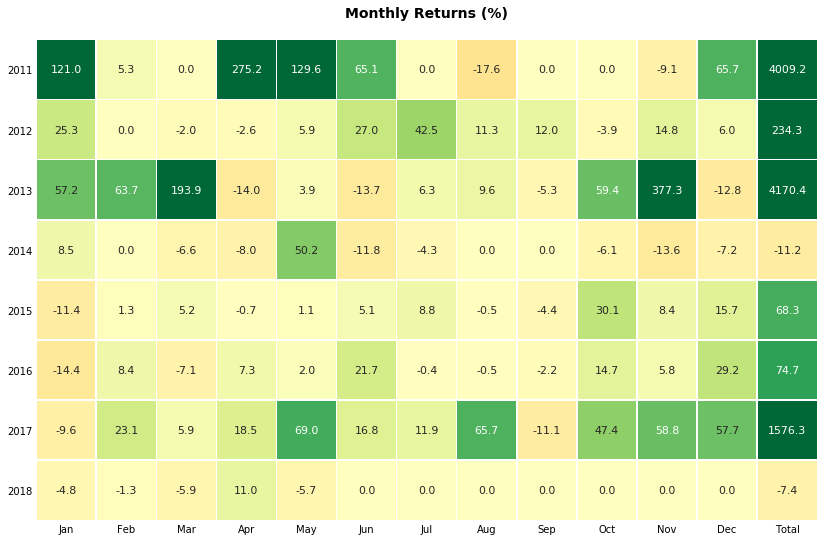

In [18]:
train.plot_heatmap(target="strategy", figsize=(14,10))

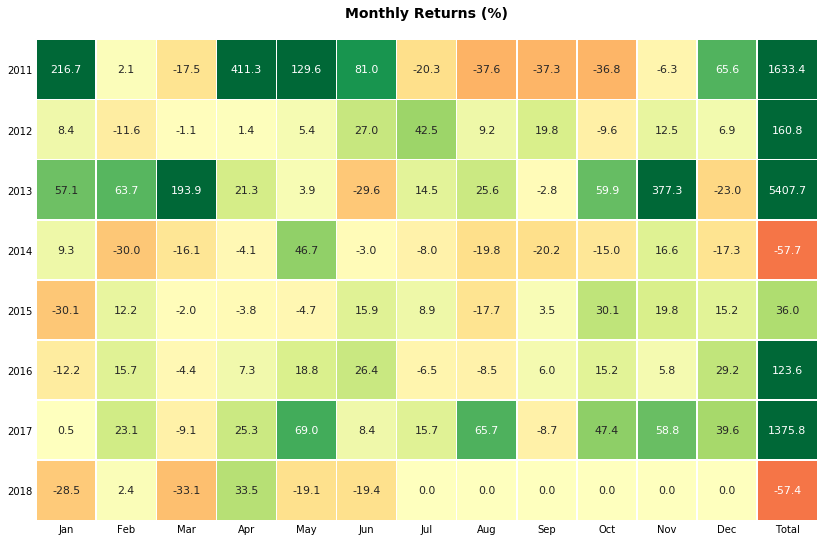

In [19]:
train.plot_heatmap(target="market", figsize=(14,10))

In [20]:
print(train)
train.drawdowns(target="strategy")

MA Backtest Strategy (ms=10, ml=21, ema=False, long_only=True, start=2011-01-01, end=2018-06-24)


,dd,high,low,highd,lowd,days,recoveryd,rdays
0,72.23,2413.05194,670.21045,2013-04-08,2013-05-02,24 days,2013-11-08,190 days
1,69.00,74.69269,23.15360,2011-06-09,2011-12-04,178 days,2012-07-12,221 days
2,45.98,8211.02114,4435.61555,2014-05-31,2015-02-17,262 days,2015-11-03,259 days
3,37.19,7983.31013,5014.64239,2013-12-03,2013-12-07,4 days,2014-05-31,175 days
4,34.94,312935.65097,203608.42875,2017-12-16,2018-03-10,84 days,2018-06-24,106 days
5,33.44,151.97464,101.15195,2012-08-16,2012-08-22,6 days,2013-01-16,147 days
6,30.31,17981.29624,12530.86144,2017-01-04,2017-01-11,7 days,2017-03-02,50 days
7,29.09,9822.69479,6964.99969,2015-11-04,2015-11-11,7 days,2016-06-12,214 days
8,27.64,7229.68309,5231.54203,2014-01-05,2014-04-26,111 days,2014-05-29,33 days
9,25.80,18.99328,14.09259,2011-05-13,2011-05-20,7 days,2011-05-25,5 days


In [21]:
print(train)
train.drawdowns(target="market")

MA Backtest Strategy (ms=10, ml=21, ema=False, long_only=True, start=2011-01-01, end=2018-06-24)


,dd,high,low,highd,lowd,days,recoveryd,rdays
0,93.46,35.00000,2.29000,2011-06-09,2011-11-20,164 days,2013-03-03,469 days
1,84.67,1151.00000,176.50000,2013-12-03,2015-01-13,406 days,2017-02-23,772 days
2,71.49,237.99000,67.85844,2013-04-08,2013-07-04,87 days,2013-11-04,123 days
3,69.04,19498.68333,6037.00833,2017-12-16,2018-06-24,190 days,2018-06-24,0 days
4,39.98,7.22000,4.33333,2012-01-05,2012-02-18,44 days,2012-07-09,142 days
5,35.45,1.10000,0.71000,2011-02-09,2011-04-04,54 days,2011-04-17,13 days
6,34.80,2961.82961,1931.21430,2017-06-11,2017-07-16,35 days,2017-08-05,20 days
7,33.83,15.40000,10.18999,2012-08-16,2012-09-01,16 days,2013-01-17,138 days
8,32.44,762.43000,515.06000,2016-06-16,2016-08-02,47 days,2016-12-02,122 days
9,32.41,4911.74002,3319.63000,2017-09-01,2017-09-14,13 days,2017-10-12,28 days


In [4]:
# Get price data from Quandl
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
# Remove the 0's
bitcoin = bitcoin.loc['2011-01-01':] # bitcoin.loc['2010-08-17':]
bitcoin.columns = ['Last']
#bitcoin = bitcoin.resample('W').last()

In [315]:
# test using different data
bitcoin = pd.read_hdf('bitstampUSD','ohlc_30M')
bitcoin = bitcoin['close'].to_frame()
bitcoin.columns = ['Last']
bitcoin = bitcoin.resample('D').last()
bitcoin.head()

,Last
Date,
2011-09-13,5.97
2011-09-14,5.53
2011-09-15,5.13
2011-09-16,4.85
2011-09-17,4.87


In [346]:
bitcoin = quandl.get("GDAX/USD") 
bitcoin = bitcoin.shift(1).dropna() # GDAX has daily OPEN, shift to get daily CLOSE
bitcoin.columns = [u'Last', u'High', u'Low', u'Volume'] # rename columns
bitcoin.tail()

,Last,High,Low,Volume
Date,,,,
2018-05-22,8481.99,8584.39,8309.23,5123.692495
2018-05-23,8397.00,8412.41,7950.00,6434.992327
2018-05-24,7970.37,8043.28,7433.19,15885.131859
2018-05-25,7555.73,7734.99,7269.00,11605.247980
2018-05-26,7577.50,7661.85,7326.94,8702.088698


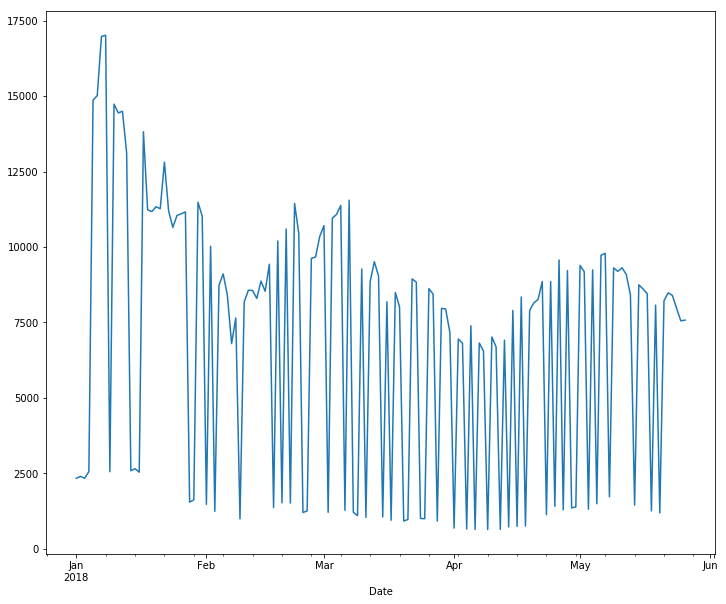

In [348]:
# Something wrong with GDAX data
bitcoin['Last'].loc['2018'].plot(figsize = (12,10))

In [336]:
bitcoin = quandl.get("BITSTAMP/USD")
bitcoin.head()

,High,Low,Last,Bid,Ask,Volume,VWAP
Date,,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22


In [281]:
alt = bitcoin
alt.head()

,Last
Date,
2011-01-01,0.299996
2011-01-02,0.299998
2011-01-03,0.299899
2011-01-04,0.298998
2011-01-05,0.299000


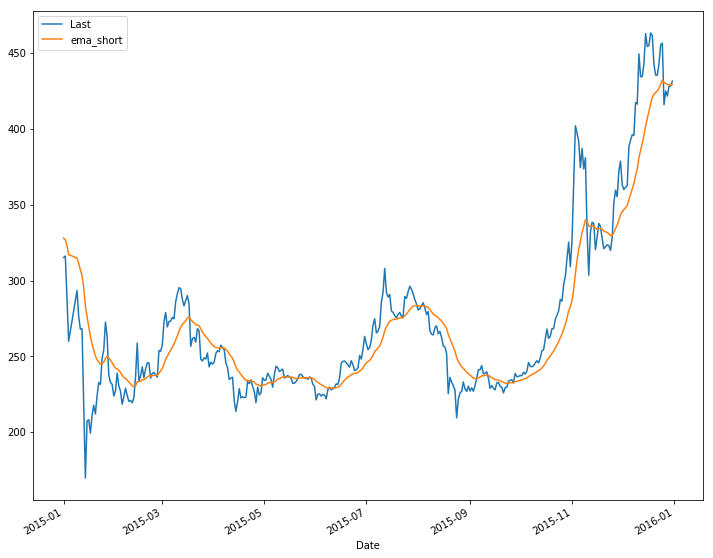

In [211]:
alt['ema_short'] = alt['Last'].ewm(span=20, adjust=False).mean()
alt[['Last','ema_short']].loc['2015'].plot(figsize= (12,10))

In [275]:
# Optimise for single moving average param
training_cutoff = len(bitcoin) / 2  # use half for training and half for test
start_date = '2011'
end_date = '2012'
ms_range = [1]
ml_range = np.arange(5,100)
returns = []

for ms in ms_range:
    for ml in ml_range:
        results = MABacktester(bitcoin['Last'].loc['2014'], ms = ms, ml = ml, long_only=False).results()
        returns.append((ml,np.round(results['Strategy'],1)))

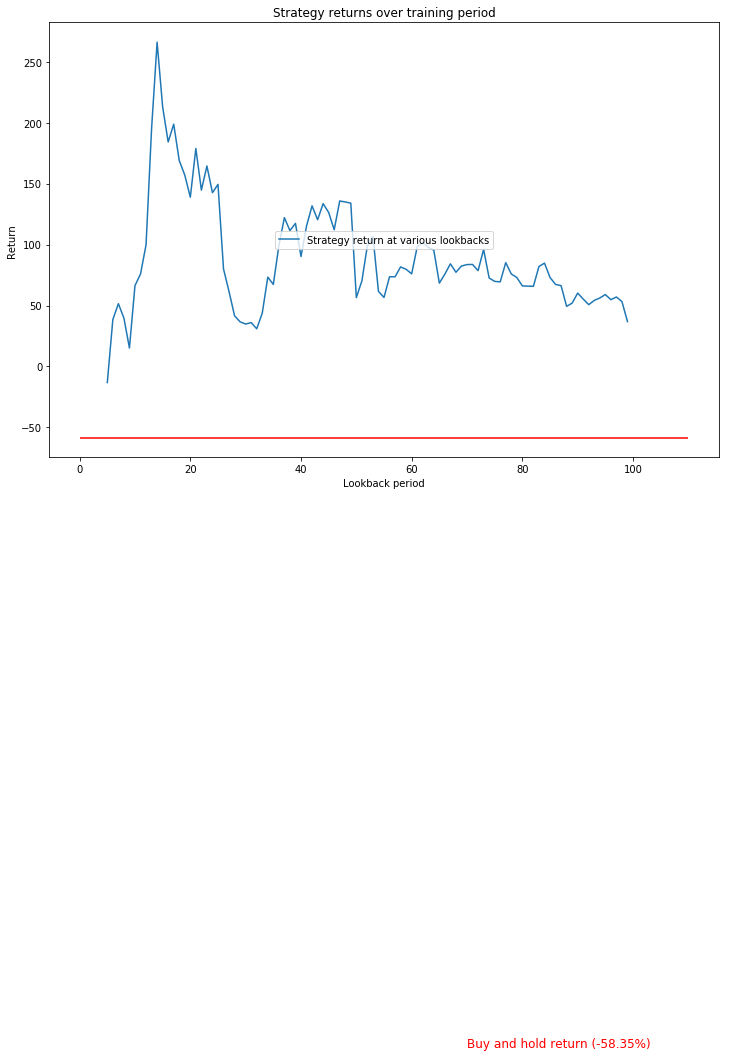

In [276]:
# Visualise the results and compare with buy and hold return
r = np.array(returns)
plt.figure(figsize=(12,8))
plt.plot(r[:,0], r[:,1], label = "Strategy return at various lookbacks");
plt.hlines(results['Market'],0,110, color='r')
plt.text(70, results['Market']-500, 'Buy and hold return (%s%%)' % results['Market'], fontsize = 12, color = 'red')
plt.legend(loc='center')
plt.title('Strategy returns over training period')
plt.xlabel('Lookback period')
plt.ylabel('Return');

In [254]:
test = MABacktester(bitcoin['Last'].iloc[training_cutoff:], ms = 1, ml = 7, long_only=False)
print test
test.results()

MA Backtest Strategy (ms=1, ml=7, ema=False, long_only=False, start=2014-09-19, end=2018-06-05)


{'Market': 1732.64,
 'Market_pa': 119.01,
 'Sharpe': 3.53,
 'Strategy': 17175.99,
 'Strategy_pa': 300.98,
 'Trades': 245,
 'Years': 3.71}

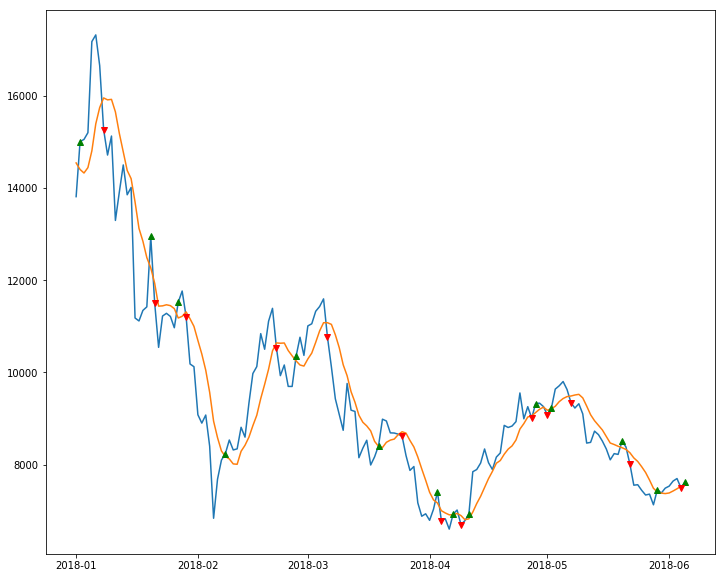

In [255]:
test.plot(start_date='2018', figsize=(12,10))

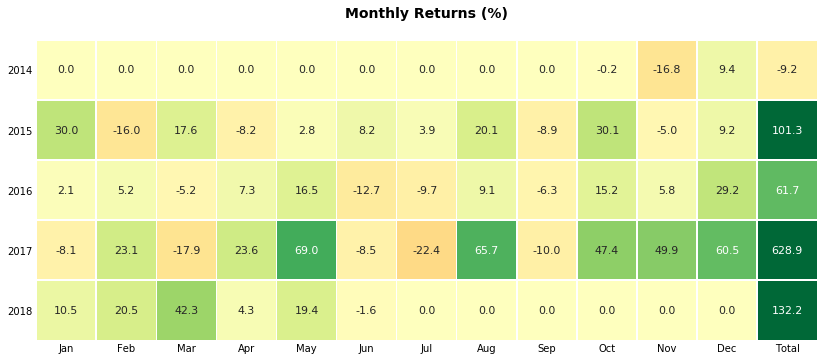

In [253]:
test.plot_heatmap(figsize=(14,10))

In [189]:
# Optimise for long and short moving average params
size = len(bitcoin) # use half for training and half for test
ms_range = [1]
ml_range = np.arange(5,100,1)
results = pd.DataFrame(np.zeros((len(ms_range),len(ml_range))), index = ms_range, columns = ml_range)

for ms in ms_range:
    for ml in ml_range:
        res = MABacktester(bitcoin['Last'].iloc[size/2:], ms = ms, ml = ml, long_only=True).results()
        strategy = res['Strategy']
        results.loc[ms,ml] = np.round(strategy,1)

results

,5,6,7,8,9,10,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
1,192.3,202.6,194.9,179.2,177.5,163.5,137.9,148.9,164.4,146.2,...,108.6,109.2,119.6,110.3,109.0,111.5,107.5,108.3,105.6,107.2


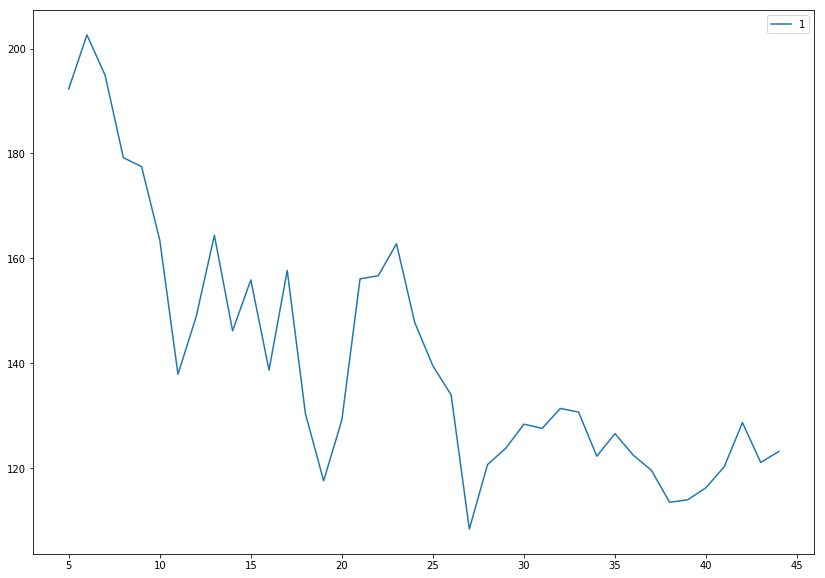

In [190]:
results.transpose()[:40].plot(figsize=(14,10))

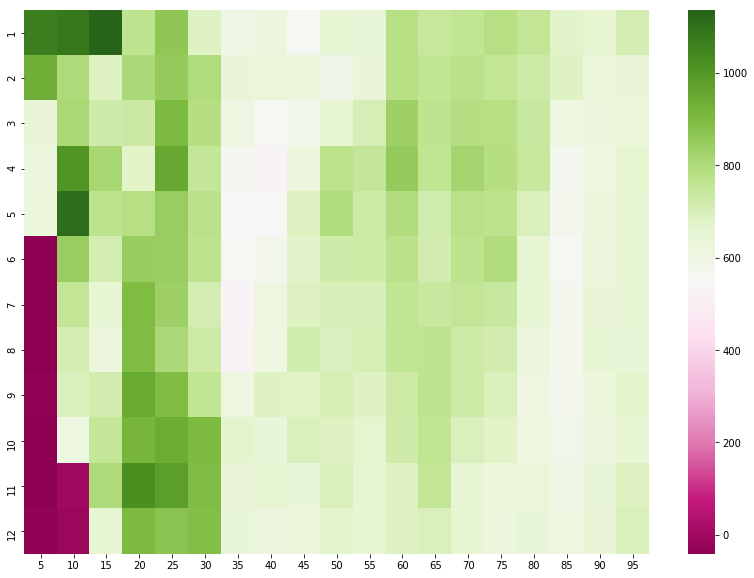

In [286]:
plt.subplots(figsize = (14,10))
sns.heatmap(results,cmap='PiYG') # RdYlGn PiYG

In [353]:
# Find the top few
temp = []
for index, row in np.argsort(results,axis=1).iloc[:,-1:].iterrows():
    i = list(results.index).index(index)
    temp.append((index, results.columns[row.iloc[0]], results.iloc[i, row.iloc[0]]))
temp.sort(key = lambda x: x[2], reverse = True)
temp

[(1, 15, 1149.6),
 (5, 10, 1124.5),
 (11, 20, 1034.8),
 (4, 10, 1020.3),
 (9, 20, 961.4),
 (10, 25, 954.1),
 (2, 5, 942.6),
 (12, 20, 915.6),
 (3, 25, 912.5),
 (8, 20, 910.4),
 (7, 20, 910.2),
 (6, 20, 856.0)]

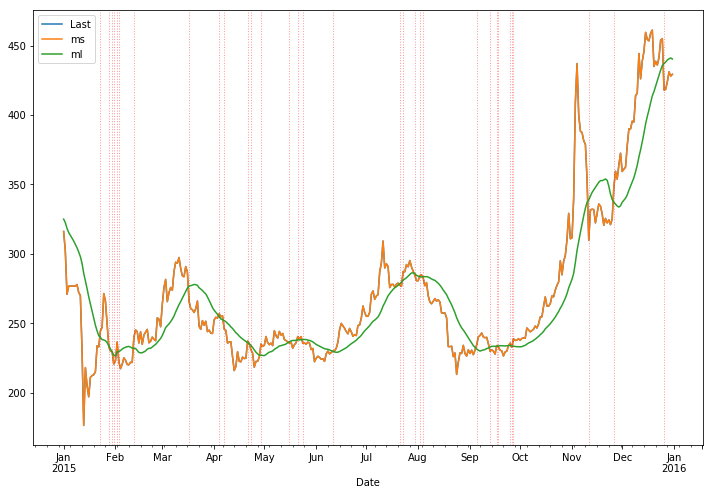

In [416]:
# Visualise on chart
ms, ml, long_only = 1, 20, False
alt['ms'] = np.round(alt['Last'].rolling(window=ms).mean(),8) # (5,50) (10,100) 
alt['ml'] = np.round(alt['Last'].rolling(window=ml).mean(),8) 
alt['madiff'] = alt['ms'] - alt['ml']
alt['stance'] = np.where(alt['madiff'] >= 0, 1, 0)
alt['trade'] = np.where(alt['stance'] != alt['stance'].shift(1), True, False)
alt[['Last','ms','ml']].loc['2015'].plot(grid=False,figsize=(12,8))
trades = alt[alt['trade']].loc['2015'].index
for xc in trades:
    plt.axvline(x=xc, color='r', linestyle=':', alpha = 0.4, linewidth = 1)

In [262]:
# Test period
reload(bt)
long_only = False
alt['Market'] = np.log(alt['Last'] / alt['Last'].shift(1))
_ , _, res  = bt.backtest_ma(alt['Last'].iloc[training_cutoff:], ms = ms, ml = ml, long_only = long_only)
res

(297.00796047672634, 228.7520936193244, 12, 2.1118035094204672)

In [263]:
# Training period
reload(bt)
alt['Market'] = np.log(alt['Last'] / alt['Last'].shift(1))
_ , _, res  = bt.backtest_ma(alt['Last'].iloc[:training_cutoff], ms = ms, ml = ml, long_only = long_only)
res

(-3.7837376118592614, 37.03654683348412, 18, 0.7376667346726099)

In [427]:
# Full period
reload(bt)
alt['Market'] = np.log(alt['Last'] / alt['Last'].shift(1))
alt['Strategy'], alt['Stance'], res  = bt.backtest_ma(alt['Last'], ms = ms, ml = ml, long_only = long_only)
res

(301.9453278719614, 428.32232225050336, 209, 4.393572159791025)

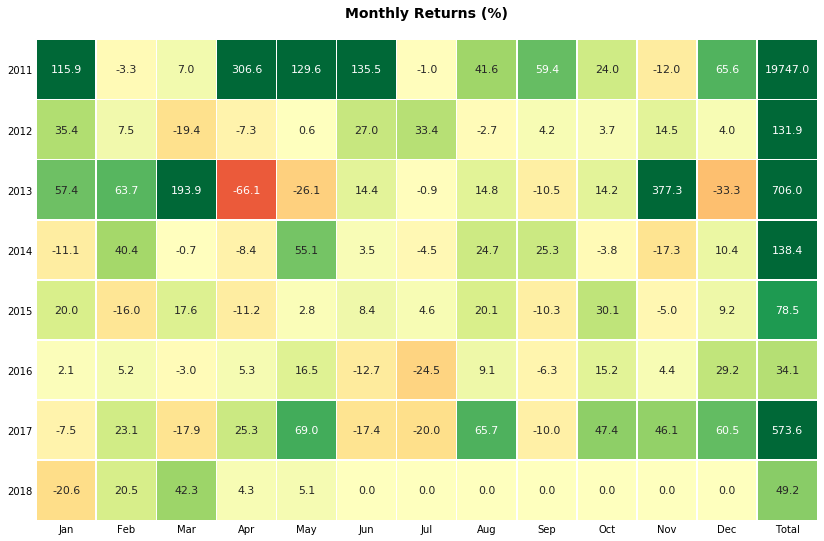

In [388]:
reload(bt)
bt.plot_return_heatmap(alt['Strategy'])

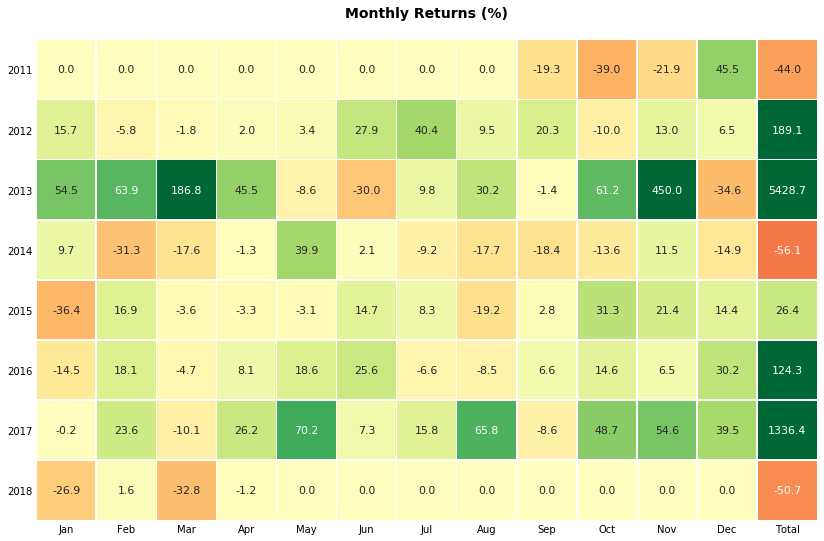

In [301]:
reload(bt)
bt.plot_return_heatmap(alt['Market'])

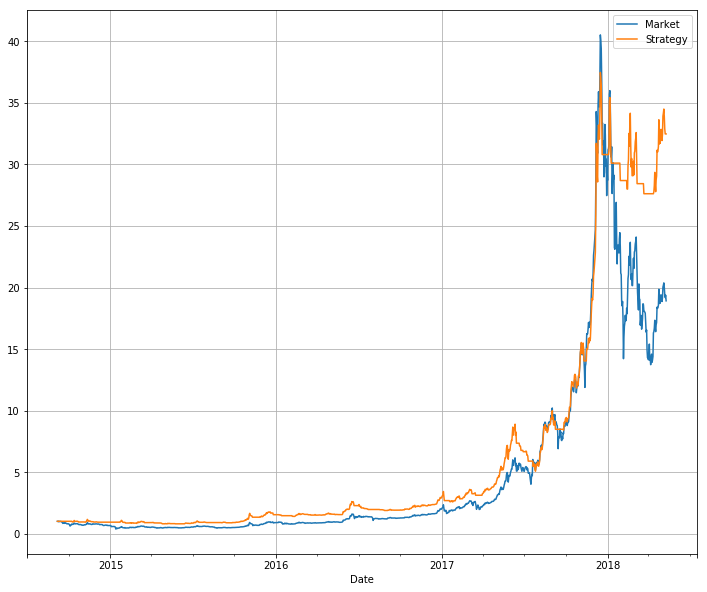

In [172]:
# Plot equity curves
alt[['Market','Strategy']].iloc[training_cutoff:].cumsum().apply(np.exp).plot(grid=True,figsize=(12,10))

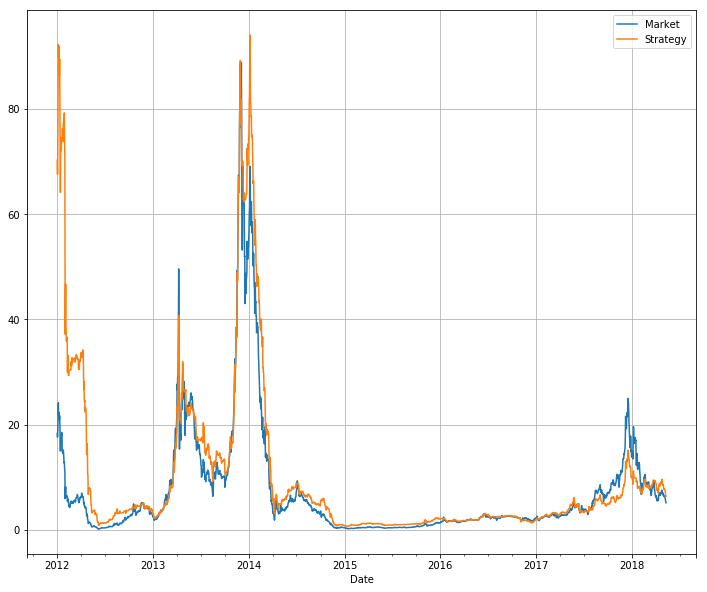

In [164]:
# Rolling 1 year comparison, use 30 days if there is not enough data
alt[['Market','Strategy']].rolling(365).sum().apply(np.exp).plot(grid=True,figsize=(12,10))

In [554]:
# drawdowns
reload(bt)
bt.table_of_drawdowns(alt['Strategy'].cumsum().apply(np.exp), cutoff = 20)

,dd,high,low,highd,lowd,days,recoveryd,rdays
0,91.24,8094.10,708.87,2013-04-08,2013-10-06,181 days,2014-08-17,315 days
1,56.10,29009.10,12735.34,2016-06-16,2016-07-29,43 days,2017-05-08,283 days
2,55.61,54314.60,24110.91,2017-06-11,2017-07-26,45 days,2017-10-14,80 days
3,54.70,240.43,108.92,2011-10-19,2011-11-08,20 days,2012-01-04,57 days
4,53.70,170743.49,79049.21,2017-12-16,2018-01-13,28 days,2018-03-27,73 days
5,53.61,6601.20,3062.20,2013-12-03,2013-12-10,7 days,2014-06-30,202 days
6,46.51,15824.99,8465.10,2015-01-13,2015-02-17,35 days,2015-10-30,255 days
7,44.81,593.47,327.55,2012-08-16,2012-08-27,11 days,2013-01-21,147 days
8,44.60,77.72,43.06,2011-06-09,2011-06-16,7 days,2011-09-07,83 days
9,42.48,13230.25,7610.45,2014-10-04,2014-12-07,64 days,2015-01-13,37 days


In [166]:
reload(bt)
bt.table_of_drawdowns(alt['Market'].cumsum().apply(np.exp), cutoff = 20)

,dd,high,low,highd,lowd,days,recoveryd,rdays
0,93.46,116.67,7.63,2011-06-09,2011-11-20,164 days,2013-03-03,469 days
1,84.67,3836.72,588.34,2013-12-03,2015-01-13,406 days,2017-02-23,772 days
2,71.49,793.31,226.20,2013-04-08,2013-07-04,87 days,2013-11-04,123 days
3,66.13,64996.48,22013.22,2017-12-16,2018-04-06,111 days,2018-05-10,34 days
4,40.01,24.07,14.44,2012-01-05,2012-02-18,44 days,2012-07-09,142 days
5,35.42,3.67,2.37,2011-02-09,2011-04-04,54 days,2011-04-17,13 days
6,34.80,9872.90,6437.47,2017-06-11,2017-07-16,35 days,2017-08-05,20 days
7,33.82,51.33,33.97,2012-08-16,2012-09-01,16 days,2013-01-17,138 days
8,32.45,2541.47,1716.89,2016-06-16,2016-08-02,47 days,2016-12-02,122 days
9,32.41,16372.69,11065.58,2017-09-01,2017-09-14,13 days,2017-10-12,28 days


In [126]:
# Statistical significance
# null hypothesis is that strategy is no different from buy and hold
# calculate prob of buy and hold achieving the same or better result
# try this using a distibution with the same moments
test_stat =  alt['Strategy'].iloc[:training_cutoff].cumsum().apply(np.exp)[-1]
end = []
for i in np.arange(10000):
    simulated = np.random.choice(alt['Market'].iloc[:training_cutoff].dropna(),training_cutoff,replace = True)
    end.append(np.exp(simulated.cumsum())[-1])

In [127]:
count = 0.0
for i in end:
    if i >= test_stat:
        count += 1
print "p value %.1f%%" % (count / len(end) * 100)
# 9.5% chance that our strategy got such a good result by chance

p value 9.7%


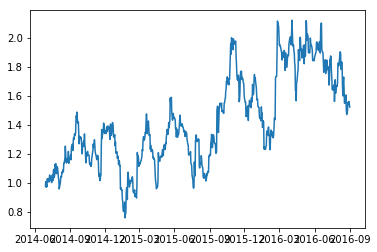

In [128]:
dates = pd.date_range(start_date, periods = training_cutoff)
simulated = pd.Series(np.random.choice(alt['Market'].iloc[:training_cutoff].dropna(),training_cutoff,replace = True), index= dates)
simprices = simulated.cumsum().apply(np.exp)
plt.plot(simprices)

In [129]:
# Statistical significance
# null hypothesis is that strategy does not capture the autcorrelations so would just do as well on a similar shaped distn
# calculate prob of strategy applied to simulated results achieving the same or better return
_ , _, res  = bt.backtest_ma(alt['Last'].iloc[:training_cutoff], ms = ms, ml = ml, long_only = long_only)
test_stat = res[1]
end = []
dates = pd.date_range(start_date, periods = training_cutoff)
for i in np.arange(10000):
    simulated = pd.Series(np.random.choice(alt['Market'].iloc[:training_cutoff].dropna(),training_cutoff,replace = True), index= dates)
    simprices = simulated.cumsum().apply(np.exp)
    _, _, res  = bt.backtest_ma(simprices, ms = ms, ml = ml, long_only = long_only)
    end.append(res[1])

In [130]:
count = 0.0
for i in end:
    if i >= test_stat:
        count += 1
print "p value %.1f%%" % (count / len(end) * 100)
# 5.6% chance that our strategy got such a good result by chance

p value 7.7%


In [131]:
print test_stat, np.mean(end), len(end)

35.98619511101617 -7.979384867413514 10000


In [133]:
# Statistical significance
# Choose the same number of longs and shorts but randomise where they occur
# What is the prob of this doing as well as the strategy did
_ , _, res  = bt.backtest_ma(alt['Last'].iloc[:training_cutoff], ms = ms, ml = ml, long_only = long_only)
test_stat = res[1]
end = []
df = alt.iloc[:training_cutoff].copy()
for i in np.arange(10000):
    df['Stance'] = np.random.choice(df['Stance'], size = len(df), replace = False)
    df['Strategy'] = df['Market'] * df['Stance'].shift(1) #shift(1) means day before
    years = len(df) / 365.25
    strategy = ((np.exp(df['Strategy'].cumsum()[-1]) ** (1 / years) - 1) * 100)
    end.append(strategy)

In [134]:
count = 0.0
for i in end:
    if i >= test_stat:
        count += 1
print "p value %.1f%%" % (count / len(end) * 100)
# 5.3% chance that our strategy got such a good result by chance

p value 3.1%


In [96]:
df = bitcoin.copy()
df.columns = ['last']
ms = 1
ml =100
hold = 20

df['market'] = np.log(df['last'] / df['last'].shift(1))

df['ms'] = np.round(df['last'].rolling(ms).mean(), 8)
df['ml'] = np.round(df['last'].rolling(ml).mean(), 8)

df['mdiff'] = df['ms'] - df['ml']
df['stance'] = np.where(df['mdiff'] >= 0, 1, 0)

# Logic for holding period
df['stance2'] = 0 

for i in range(1,len(df)): 
    # a cross over short over long and we are currently in cash 
    if (df['stance'].iloc[i] > df['stance'].iloc[i-1]) and (df['stance'].iloc[i-1] == 0) and (df['stance2'].iloc[i-1] == 0):
        print i
        # buy and hold for the next x days
        #df['stance2'].iloc[i:i+hold-1] = 1
        #df['stance2'].iloc[i+hold] = 0
#        for k in range(self._hold):
#            try:
#                df['stance2'].iloc[i+k] = 1
#                df['stance2'].iloc[i+k+1] = 0
#            except:
#                pass

crossovers = np.where((df['stance'] ==1) & (df['stance'].shift(1) == 0))
crossovers[0]
#for i in crossovers:
#    print i
    



99
352
417
428
436
475
487
494
499
684
891
900
947
954
962
1005
1237
1239
1527
1541
1554
1626
1746
1870
1892
1901
1907
2044
2077
2106
2269
2277
2389
2579
2583
2670
2672
2674


array([  99,  352,  417,  428,  436,  475,  487,  494,  499,  684,  891,
        900,  947,  954,  962, 1005, 1237, 1239, 1527, 1541, 1554, 1626,
       1746, 1870, 1892, 1901, 1907, 2044, 2077, 2106, 2269, 2277, 2389,
       2579, 2583, 2670, 2672, 2674])

In [48]:
df[df.stance == 1]
df.loc['2011-07-19']
df.tail()
df.iloc[198:230]

,last,market,ms,ml,mdiff,stance,stance2
Date,,,,,,,
2011-07-18,14.700000,0.071175,14.700000,NaN,NaN,0,0
2011-07-19,14.040000,-0.045937,14.040000,6.006806,8.033194,1,1
2011-07-20,13.938900,-0.007227,13.938900,6.075000,7.863900,1,1
2011-07-21,13.938900,0.000000,13.938900,6.143195,7.795705,1,1
2011-07-22,13.920000,-0.001357,13.920000,6.211295,7.708705,1,1
2011-07-23,13.979999,0.004301,13.979999,6.279700,7.700299,1,1
2011-07-24,14.739900,0.052930,14.739900,6.351905,8.387995,1,1
2011-07-25,14.400000,-0.023330,14.400000,6.422295,7.977705,1,1
2011-07-26,14.130000,-0.018928,14.130000,6.491330,7.638670,1,1
